In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
df = pd.read_csv(r"C:\Users\User\Python\IIITB\AWS\Diabetes\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df['diabetes'].value_counts(normalize=True)*100

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

In [6]:
print(df.shape)

(100000, 9)


<Axes: xlabel='diabetes', ylabel='count'>

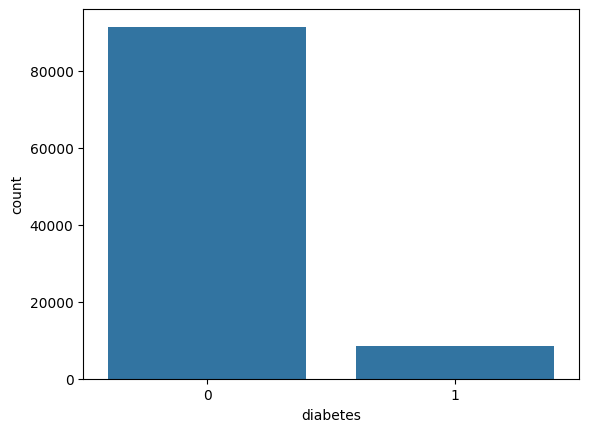

In [7]:
sns.countplot(df,x='diabetes')

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
dups = df[df.duplicated()]
print("Duplicate rows are: ",dups.shape[0])

Duplicate rows are:  3854


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(96146, 9)

In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
#Unique Values
for column in df.columns:
    print(column,"-",len(df[column].unique()))

gender - 3
age - 102
hypertension - 2
heart_disease - 2
smoking_history - 6
bmi - 4247
HbA1c_level - 18
blood_glucose_level - 18
diabetes - 2


In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [15]:
df1 = df.drop('diabetes',axis=1)
df1.columns

num = df1.select_dtypes(np.number)
char=df1[['gender','smoking_history']]
print(num,char)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99994  36.0             0              0  24.60          4.8   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  
0                      140  
1                       80  
2                      158  
3                      155  
4                      155  
...                    ...  
99994                  145  

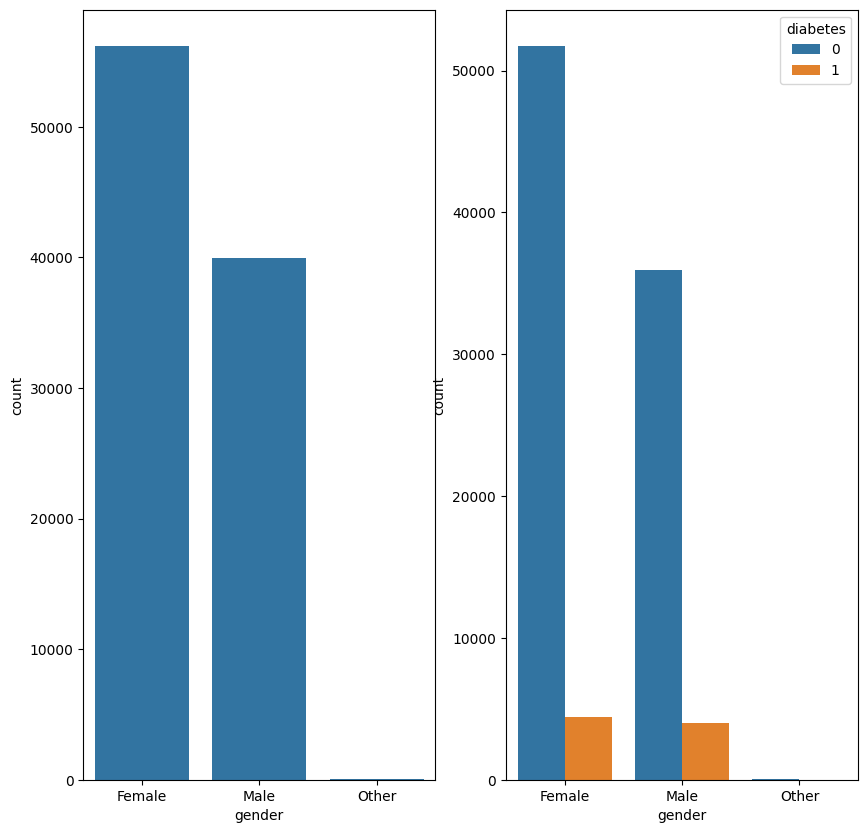

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.countplot(data=df,x='gender')
plt.subplot(1,2,2)
sns.countplot(data=df,x='gender',hue='diabetes')
plt.show()

### More Females are diabetic than males

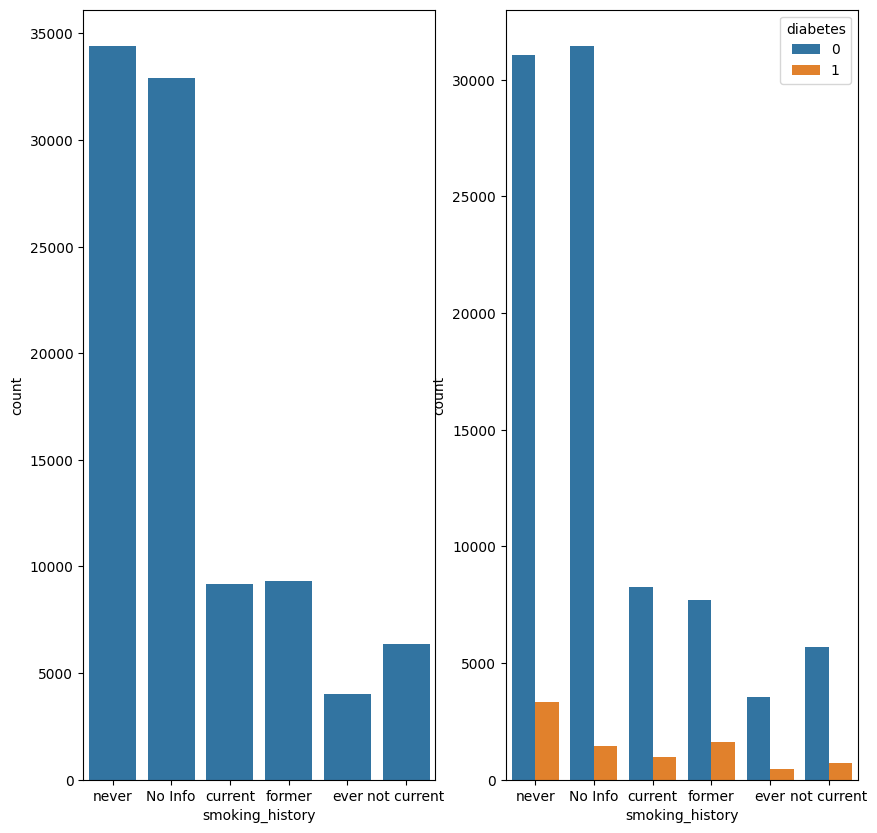

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.countplot(data=df,x='smoking_history')
plt.subplot(1,2,2)
sns.countplot(data=df,x='smoking_history',hue='diabetes')
plt.show()

### Never smoked > former smoker > no info > current > current 
### Never smoked person are less diabetic than all time smoker

In [18]:
num.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

<Axes: xlabel='diabetes', ylabel='age'>

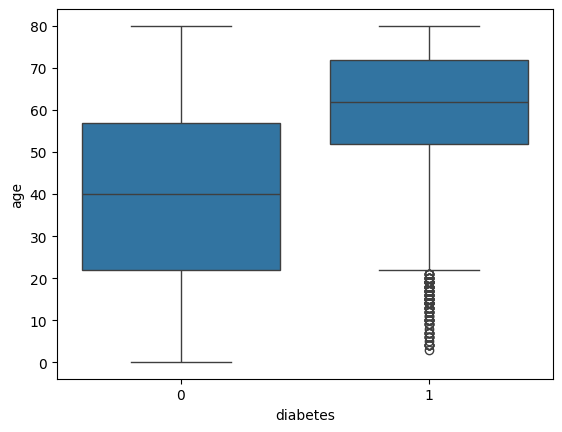

In [19]:
sns.boxplot(y=df['age'],x=df['diabetes'])

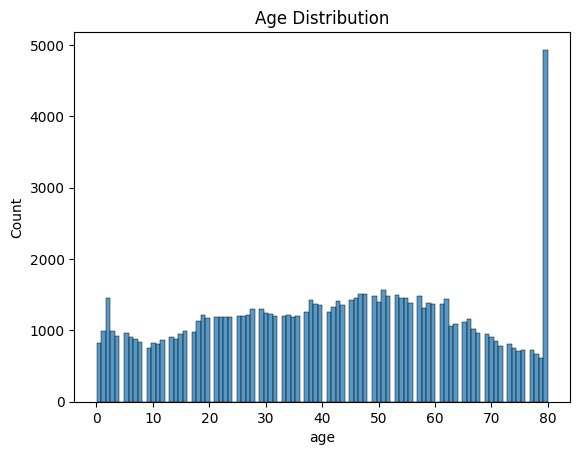

In [20]:
sns.histplot(df['age'], bins=100)
plt.title('Age Distribution')
plt.show()

### Post 50 people are more diabetic

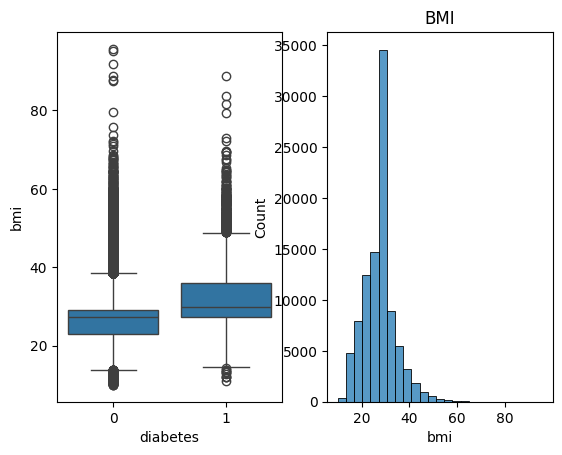

In [21]:
plt.subplot(1,2,1)
sns.boxplot(y=df['bmi'],x=df['diabetes'])
plt.subplot(1,2,2)
sns.histplot(df['bmi'],bins=25)
plt.title('BMI')
plt.show()

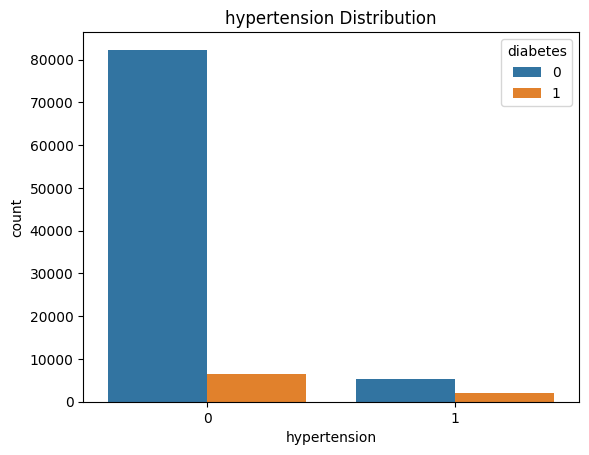

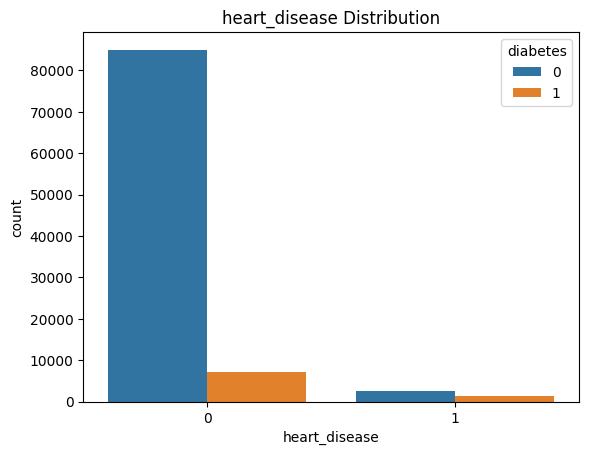

In [22]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease']:
    sns.countplot(x=col, data=df,hue='diabetes')
    plt.title(f'{col} Distribution')
    plt.show()

### People having hypertension & heart disease are more prone to Diabetes

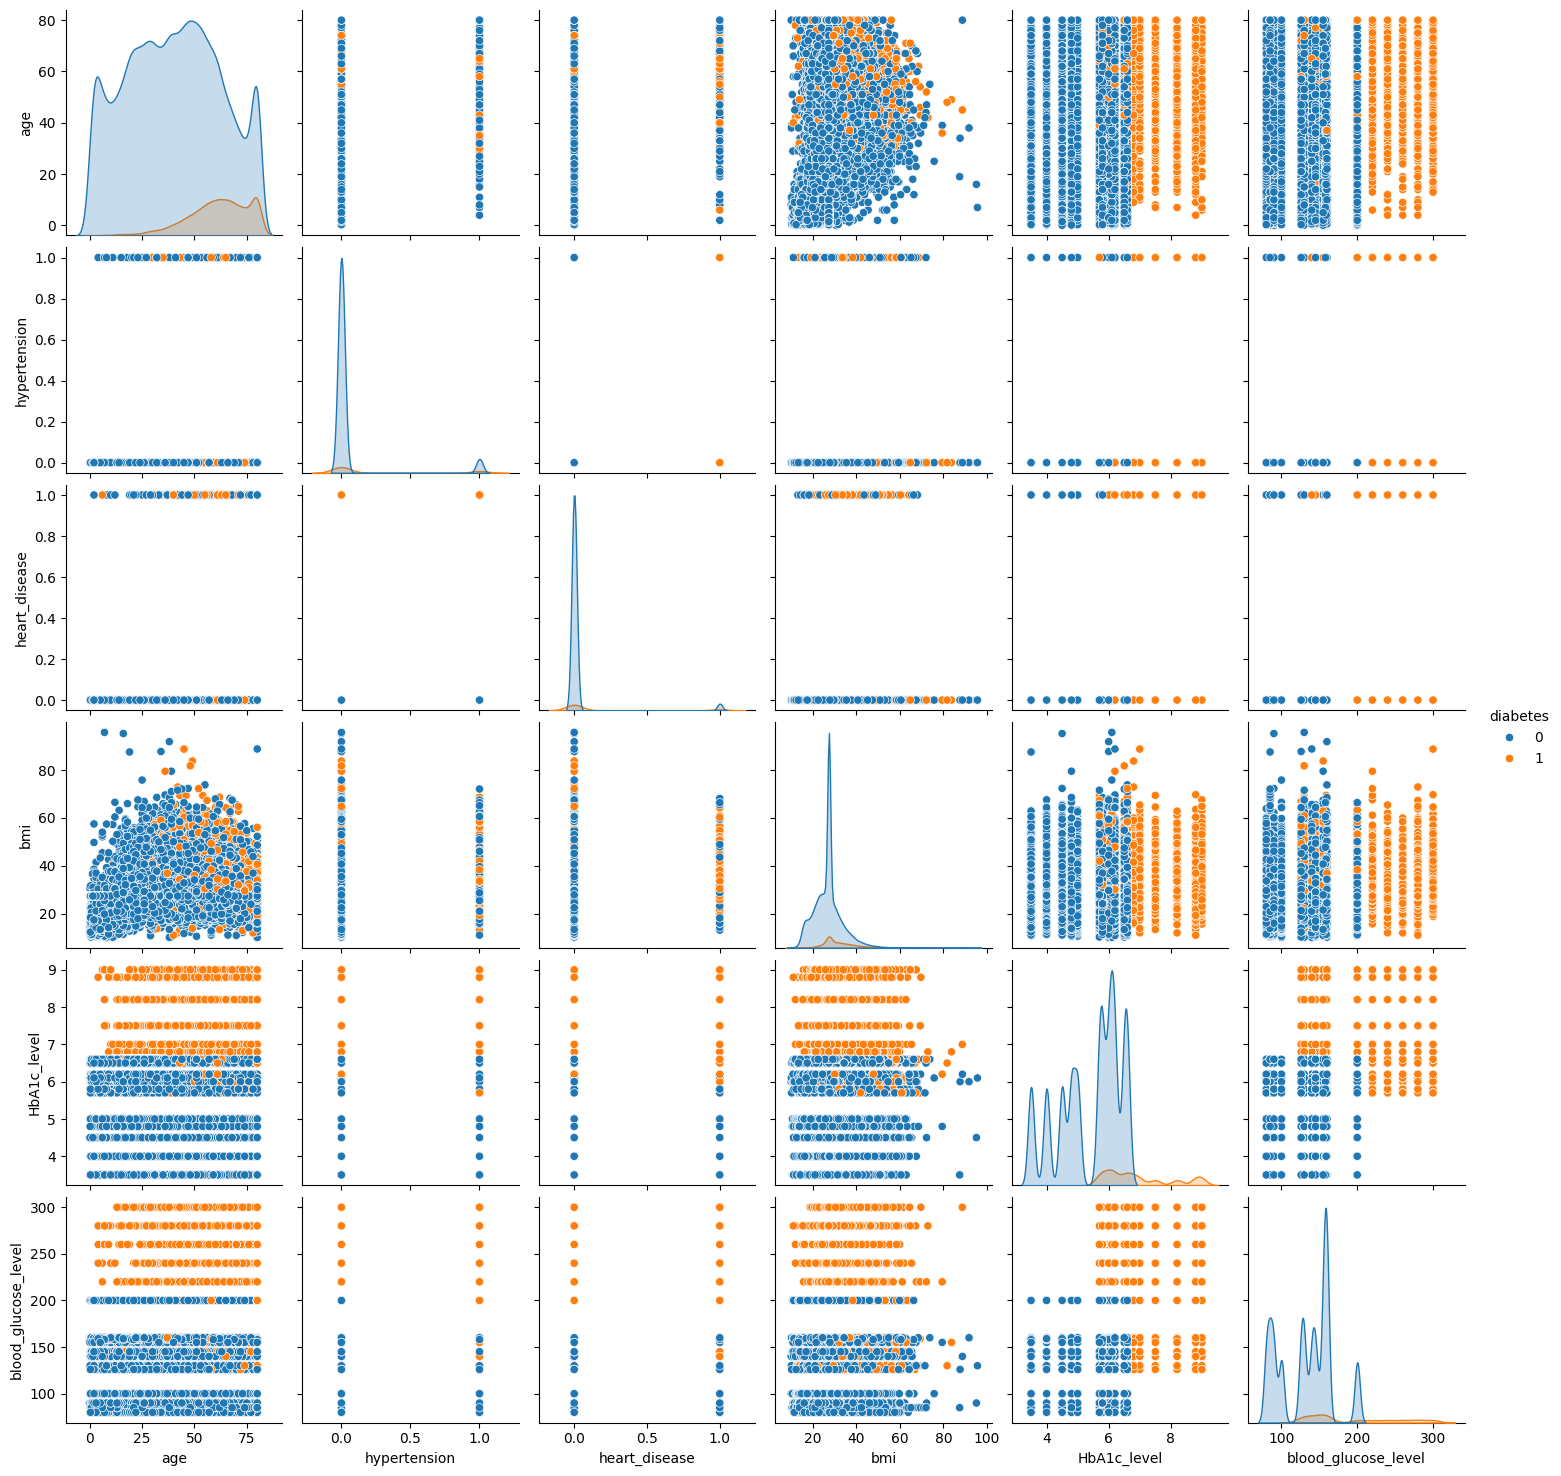

In [23]:
# Pair plot for numeric features
sns.pairplot(df, hue='diabetes')
plt.show()

### Few investigation needed for all columns

In [24]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

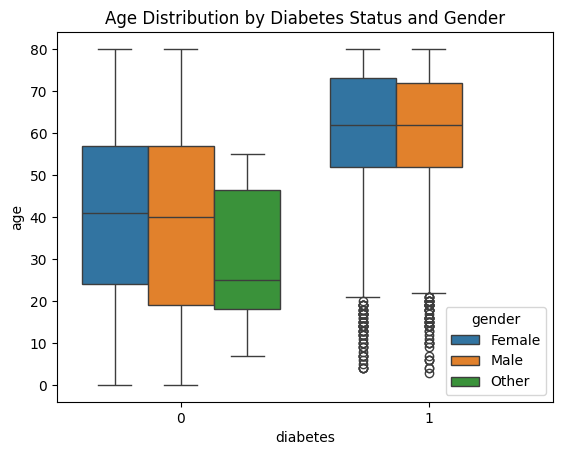

In [25]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

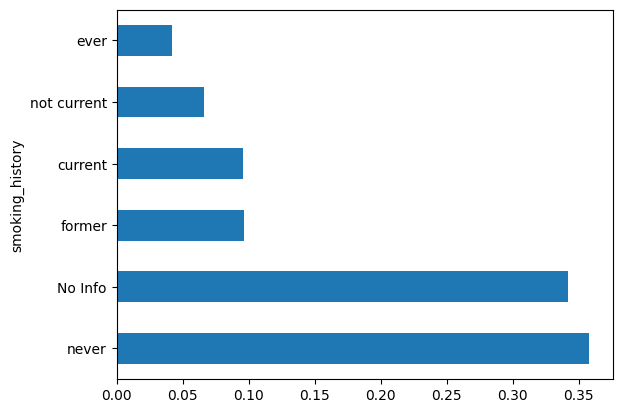

In [129]:
df['smoking_history'].value_counts(normalize=True).plot.barh()
plt.show()

In [27]:
def smoke(i):
    if i in ['never','No Info']:
        return 'non_smoker'
    elif i in ['current']:
        return 'smoker'
    elif i in ['former','ever','not current']:
        return 'past_smoker'

df['smoker'] = df['smoking_history'].apply(smoke)
df['smoker'].value_counts(normalize=True)*100

smoker
non_smoker     69.982111
past_smoker    20.452229
smoker          9.565661
Name: proportion, dtype: float64

In [33]:
df = df.drop('smoking_history',axis=1,inplace=True)
df1=df.copy()
df1.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoker
0,Female,80.0,0,1,25.19,6.6,140,0,non_smoker
1,Female,54.0,0,0,27.32,6.6,80,0,non_smoker
2,Male,28.0,0,0,27.32,5.7,158,0,non_smoker
3,Female,36.0,0,0,23.45,5.0,155,0,smoker
4,Male,76.0,1,1,20.14,4.8,155,0,smoker


### One Hot encoding for Char variables

In [34]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoker_past_smoker,smoker_smoker
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False
3,36.0,0,0,23.45,5.0,155,0,False,False,False,True
4,76.0,1,1,20.14,4.8,155,0,True,False,False,True


In [35]:
df1.replace(True,1,inplace=True)
df1.replace(False,0,inplace=True)
df1.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoker_past_smoker,smoker_smoker
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0
3,36.0,0,0,23.45,5.0,155,0,0,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1


<Axes: >

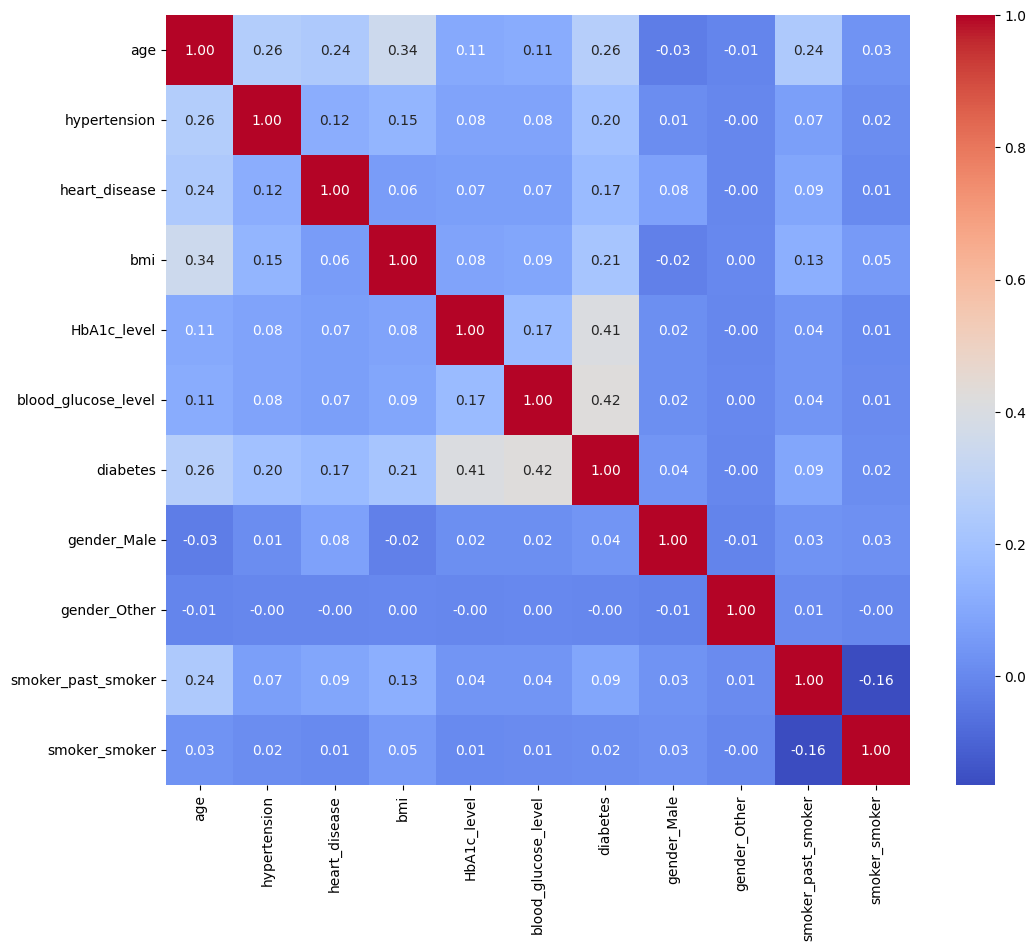

In [56]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),cmap="coolwarm", annot=True, fmt='.2f')

In [63]:
df1_c = df1.corr()
df1_c['diabetes'].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264927
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
smoker_past_smoker     0.092487
gender_Male            0.037883
smoker_smoker          0.017037
gender_Other          -0.004256
Name: diabetes, dtype: float64

In [64]:
df1.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoker_past_smoker', 'smoker_smoker'],
      dtype='object')

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  96146 non-null  float64
 1   hypertension         96146 non-null  int64  
 2   heart_disease        96146 non-null  int64  
 3   bmi                  96146 non-null  float64
 4   HbA1c_level          96146 non-null  float64
 5   blood_glucose_level  96146 non-null  int64  
 6   diabetes             96146 non-null  int64  
 7   gender_Male          96146 non-null  int64  
 8   gender_Other         96146 non-null  int64  
 9   smoker_past_smoker   96146 non-null  int64  
 10  smoker_smoker        96146 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 8.8 MB


In [66]:
x = df1.drop('diabetes',axis=1)
y = df1['diabetes']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=23)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(64417, 10) (64417,) (31729, 10) (31729,)


In [79]:
y_train.value_counts()

diabetes
0    58730
1     5687
Name: count, dtype: int64

Accuracy Score: 0.9572945885467553
Roc AUC Score: 0.8056010823720334
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28934
           1       0.85      0.62      0.72      2795

    accuracy                           0.96     31729
   macro avg       0.91      0.81      0.85     31729
weighted avg       0.95      0.96      0.95     31729



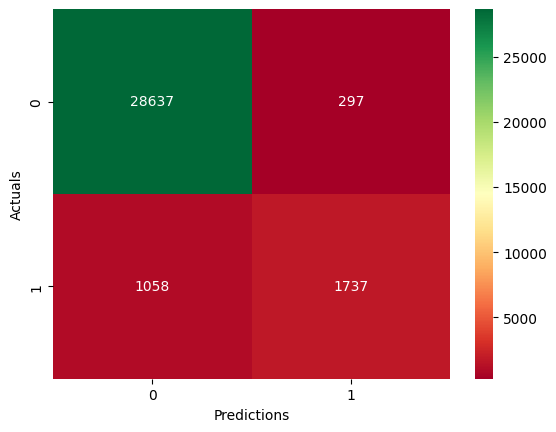

In [76]:
mod = LogisticRegression(max_iter=500)
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [83]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

sm = SMOTE(random_state=6)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_sm.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0))) 

Before OverSampling, counts of label '1': 5687
Before OverSampling, counts of label '0': 58730 

After OverSampling, the shape of train_X: (117460, 10)
After OverSampling, the shape of train_y: (117460,) 

After OverSampling, counts of label '1': 58730
After OverSampling, counts of label '0': 58730


Accuracy Score: 0.8825049639131394
Roc AUC Score: 0.8576814199189743
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     28934
           1       0.42      0.83      0.55      2795

    accuracy                           0.88     31729
   macro avg       0.70      0.86      0.74     31729
weighted avg       0.93      0.88      0.90     31729



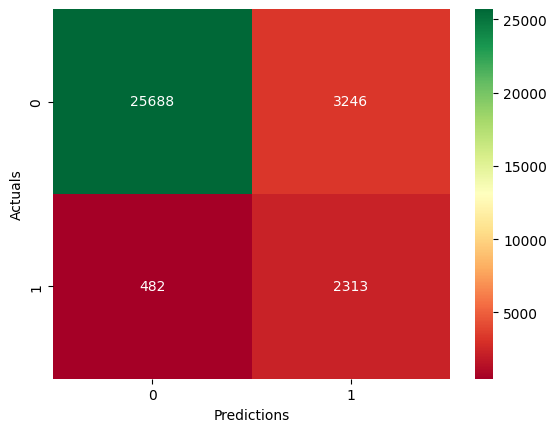

In [84]:
mod = LogisticRegression(max_iter=500)
mod.fit(x_train_sm,y_train_sm)
y_pred = mod.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### we'll be using SMOTE datasets, as it has significantly increased Recall & Accuracy

### Standardization

In [85]:
ss = StandardScaler()
x_train_s = ss.fit_transform(x_train_sm)
x_test_s = ss.transform(x_test)

Accuracy Score: 0.882536480821961
Roc AUC Score: 0.8576987006267921
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     28934
           1       0.42      0.83      0.55      2795

    accuracy                           0.88     31729
   macro avg       0.70      0.86      0.74     31729
weighted avg       0.93      0.88      0.90     31729



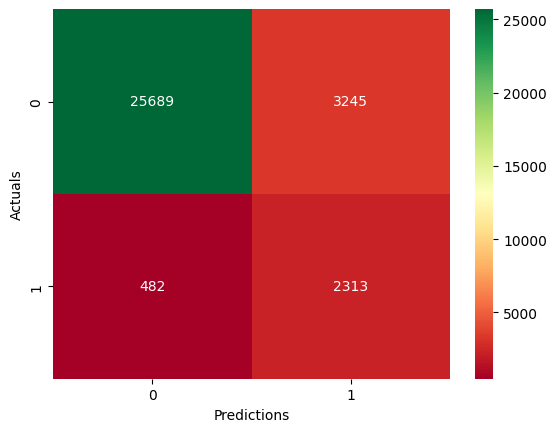

In [86]:
mod = LogisticRegression(max_iter=500)
mod.fit(x_train_s,y_train_sm)
y_pred = mod.predict(x_test_s)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Scaling has no role to play, lets try Power Transform

In [87]:
pt = PowerTransformer()
x_train_pt = pt.fit_transform(x_train_sm)
x_test_pt = pt.transform(x_test)

Accuracy Score: 0.8813703551955624
Roc AUC Score: 0.8602915178124837
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     28934
           1       0.41      0.83      0.55      2795

    accuracy                           0.88     31729
   macro avg       0.70      0.86      0.74     31729
weighted avg       0.93      0.88      0.90     31729



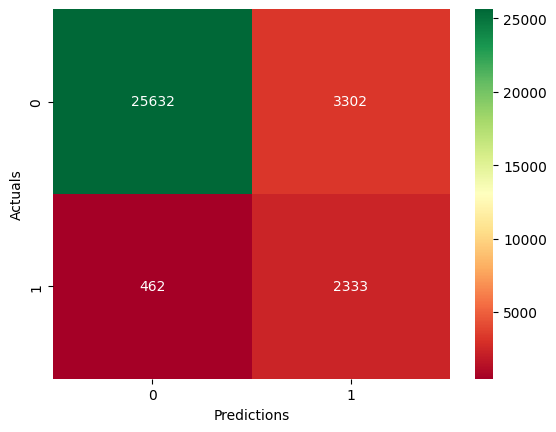

In [88]:
mod = LogisticRegression(max_iter=500)
mod.fit(x_train_pt,y_train_sm)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Power Transformer doesnt seem to have any major impact on ROC/Recall as no need to use them

In [89]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform on power transformed data
x_over, y_over = oversample.fit_resample(x_train, y_train)

# summarize class distribution
print(x_over.shape,y_over.shape)
print(y_over.value_counts())

(117460, 10) (117460,)
diabetes
0    58730
1    58730
Name: count, dtype: int64


Accuracy Score: 0.8818746257367077
Roc AUC Score: 0.8801228395560162
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     28934
           1       0.42      0.88      0.57      2795

    accuracy                           0.88     31729
   macro avg       0.70      0.88      0.75     31729
weighted avg       0.94      0.88      0.90     31729



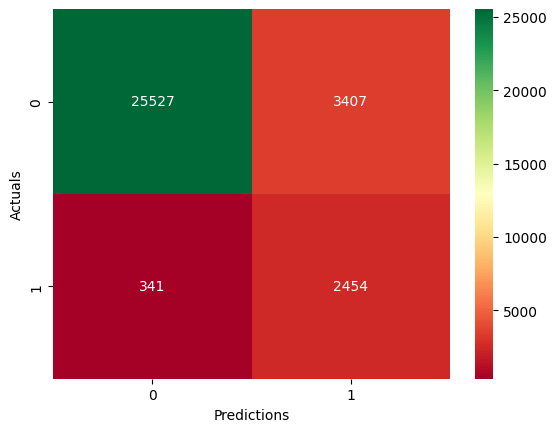

In [90]:
mod = LogisticRegression(max_iter=500)
mod.fit(x_over,y_over)
y_pred = mod.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7755905511811023
Roc AUC Score: 0.7589304586768126
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       171
           1       0.64      0.71      0.67        83

    accuracy                           0.78       254
   macro avg       0.75      0.76      0.75       254
weighted avg       0.78      0.78      0.78       254



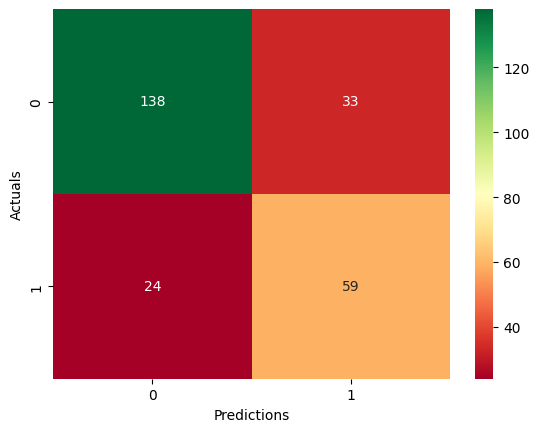

In [202]:
mod = RandomForestClassifier()
mod.fit(x_over,y_over)
y_pred = mod.predict(x_test_pt)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Random OverSample outperforms SMOTE
### Hence, we'll be using x_over & y_over

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Accuracy Score: 0.91856030760503
Roc AUC Score: 0.8961973292372388
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     28934
           1       0.52      0.87      0.65      2795

    accuracy                           0.92     31729
   macro avg       0.75      0.90      0.80     31729
weighted avg       0.95      0.92      0.93     31729



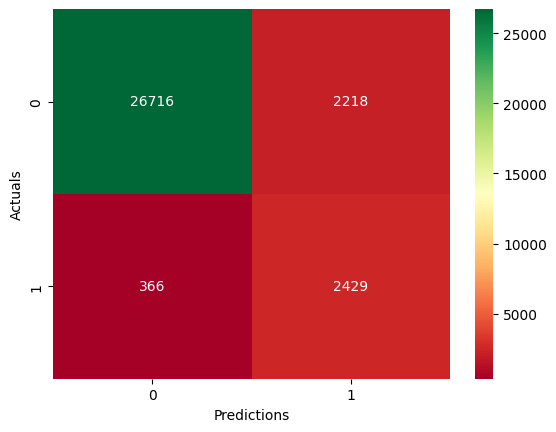

In [91]:
mod = XGBClassifier()
mod.fit(x_over,y_over)
y_pred = mod.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9621797094141007
Roc AUC Score: 0.8498134054518995
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28934
           1       0.83      0.71      0.77      2795

    accuracy                           0.96     31729
   macro avg       0.90      0.85      0.87     31729
weighted avg       0.96      0.96      0.96     31729



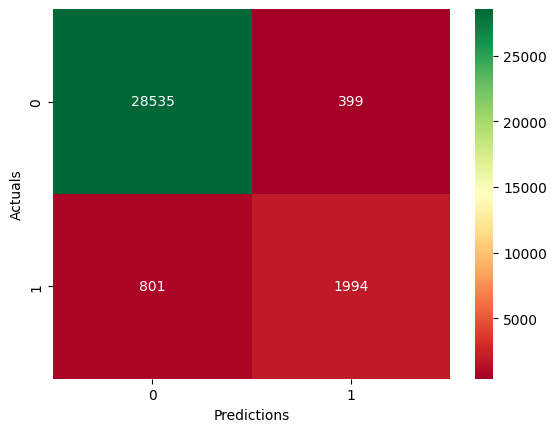

In [95]:
rf = RandomForestClassifier()
rf.fit(x_over, y_over)
y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdYlGn',fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Now lets optimize the XGBoost Tree

In [116]:
# Hyper Parameter Optimization
params = {
    "n_estimators":     range(80,180,20),
    "learning_rate":    [0.01, 0.10, 0.20, 0.30],
    "max_depth":        [3, 10, 15],
    "min_child_weight": [1, 5, 7, 12],
    "gamma":            [0.0, 0.3],
    "colsample_bytree": [0.3, 0.7]     
        }
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
grid_search = GridSearchCV(clf, param_grid=params, n_jobs=-1, scoring = 'roc_auc', cv=5, verbose=3)
grid_search.fit(x_over,y_over)
grid_search.best_params_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.2,
 'max_depth': 15,
 'min_child_weight': 1,
 'n_estimators': 160}

In [139]:
#Evaluate XGboost model
# fit model on training data
XGBmodel = XGBClassifier()
XGBmodel.fit(x_over, y_over)

XGB_test_score = XGBmodel.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
cm = confusion_matrix(y_test,y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Model Accuracy: 0.91856030760503
XGboost roc_value: 0.9743988075755161
XGBoost threshold: 0.39143285155296326
[[26716  2218]
 [  366  2429]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     28934
           1       0.52      0.87      0.65      2795

    accuracy                           0.92     31729
   macro avg       0.75      0.90      0.80     31729
weighted avg       0.95      0.92      0.93     31729



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

XGboost roc_value: 0.9743988075755161
XGBoost threshold: 0.39143285155296326
ROC for the test dataset 97.4%
FPR:  [0.         0.         0.         ... 0.99986175 0.99993088 1.        ]
TPR:  [0.         0.02110912 0.06547406 ... 1.         1.         1.        ]


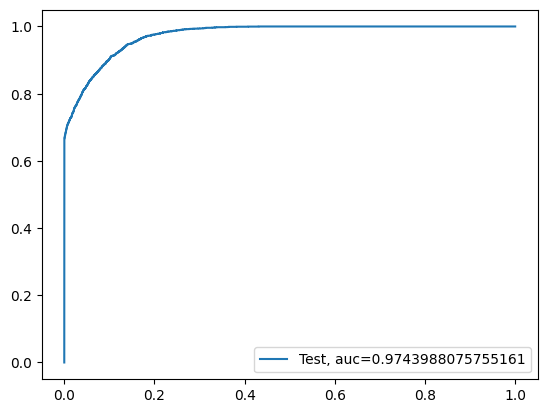

In [140]:
#### Print the FPR,TPR & select the best threshold from the roc curve
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
print("FPR: ",fpr)
print("TPR: ",tpr)
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [141]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9743988075755161
XGBoost threshold: 0.39143285155296326


### Seems XGBoost is the best
### Export using Pickle

In [142]:
import pickle
pickle.dump(mod,open('model.pkl','wb'))

In [154]:
df1[df1['diabetes']==1]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoker_past_smoker,smoker_smoker
6,44.0,0,0,19.31,6.5,200,1,0,0,0,0
26,67.0,0,1,27.32,6.5,200,1,1,0,1,0
38,50.0,1,0,27.32,5.7,260,1,1,0,0,1
40,73.0,0,0,25.91,9.0,160,1,1,0,1,0
53,53.0,0,0,27.32,7.0,159,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99935,65.0,1,1,33.55,8.2,140,1,0,0,0,0
99938,55.0,0,1,30.42,6.2,300,1,1,0,1,0
99957,61.0,0,0,34.45,6.5,280,1,0,0,0,0
99962,58.0,1,0,38.31,7.0,200,1,0,0,0,0


In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  96146 non-null  float64
 1   hypertension         96146 non-null  int64  
 2   heart_disease        96146 non-null  int64  
 3   bmi                  96146 non-null  float64
 4   HbA1c_level          96146 non-null  float64
 5   blood_glucose_level  96146 non-null  int64  
 6   diabetes             96146 non-null  int64  
 7   gender_Male          96146 non-null  int64  
 8   gender_Other         96146 non-null  int64  
 9   smoker_past_smoker   96146 non-null  int64  
 10  smoker_smoker        96146 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 8.8 MB
